In [23]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end
include("/home/sergey/work/repo/dynamical-systems/system.jl")

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


jac_FHN (generic function with 1 method)

In [24]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [25]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [26]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [27]:
I0 = -1.723; U0 = 0.282

p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = [10.51889851040009, 0.7246860444367084, 0.4355746956126687];

In [28]:
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.282, 0.305, 0.3, -1.723]
 time:          0.0
 state:         [10.51889851040009, 0.7246860444367084, 0.4355746956126687]


In [29]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [30]:
Jac = jacob_TM_(fp[1], p, 0)
eivecs = eigvecs(Jac)
shift = real(eivecs[:, 1])*1e-7 + fp[1]

3-element SVector{3, Float64} with indices SOneTo(3):
 8.390628454687537
 0.7368869703324222
 0.43046003481782397

In [31]:
prob_for = ODEProblem(TM, u0_1, (0.0, 1000), p) # SA[11.0, 0.4, 0.6]
sol_for = solve(prob_for, alg = Vern9(), adaptive = false, dt = 0.001); 

┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase /home/sergey/.julia/packages/SciMLBase/Dwomw/src/integrator_interface.jl:600


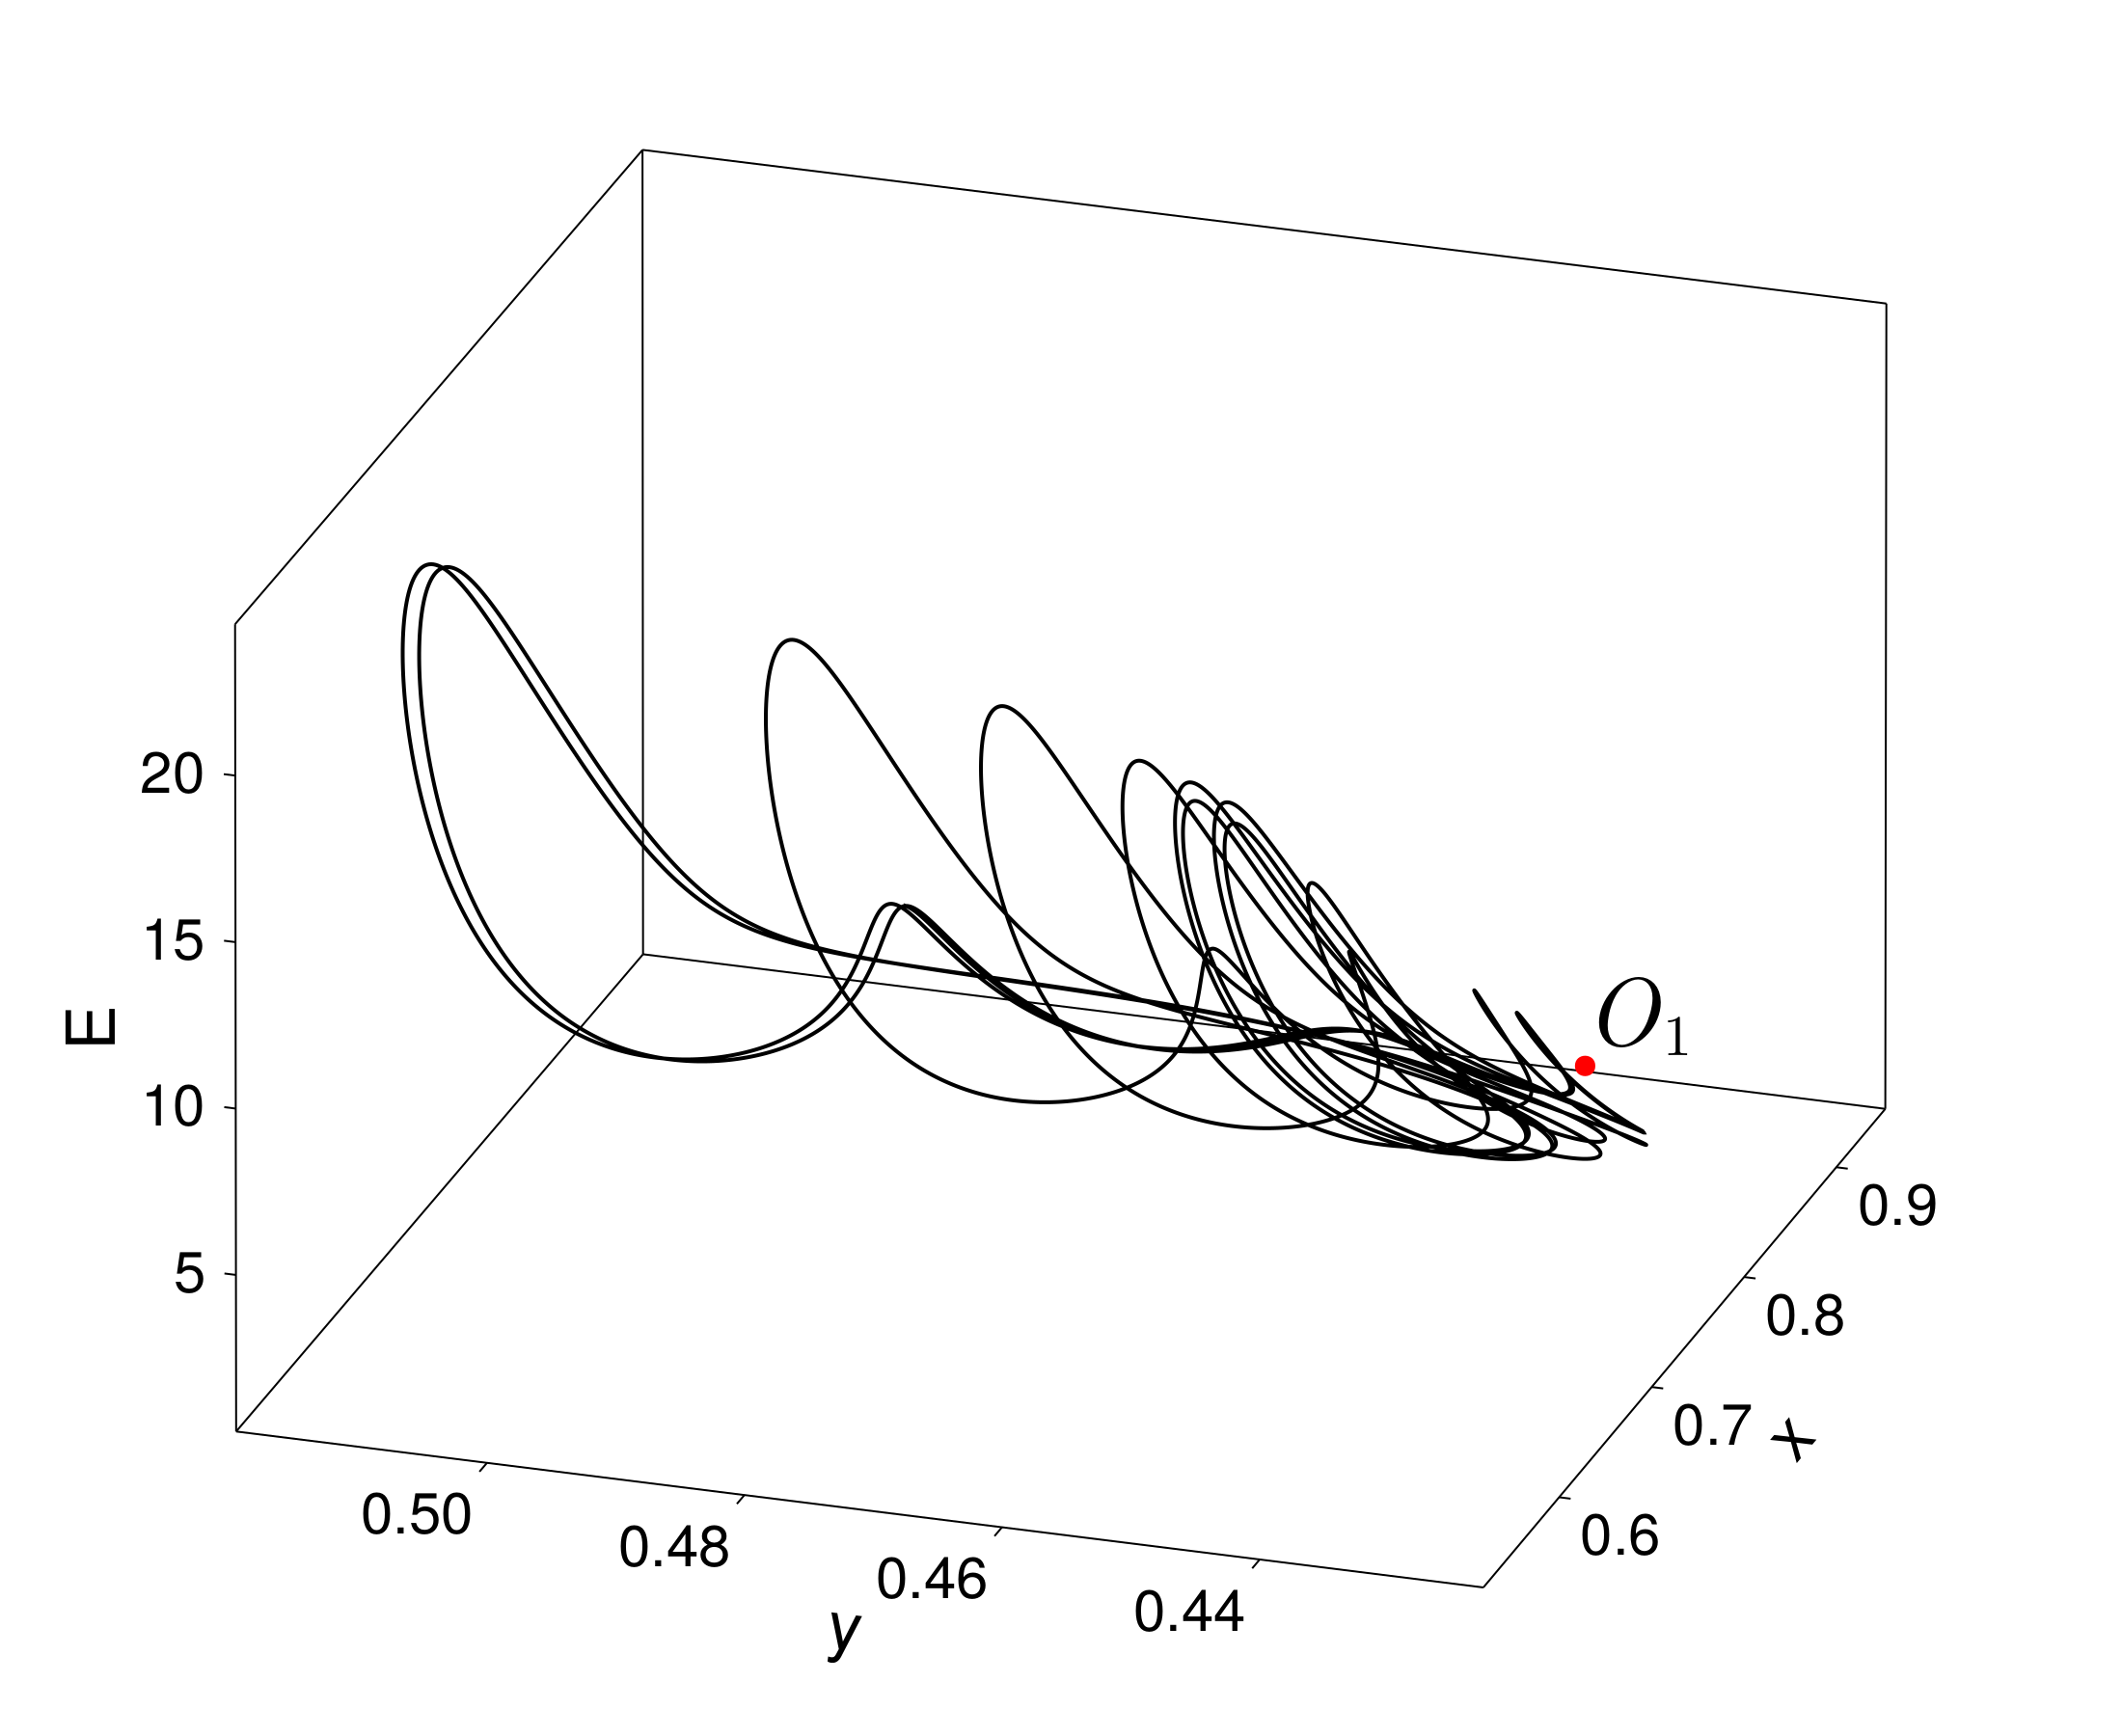

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie /home/sergey/.julia/packages/Makie/VRavR/src/scenes.jl:220


CairoMakie.Screen{IMAGE}


In [33]:
idx, idy, idz = 2, 3, 1
az = 1.1pi;
ts, tf = 960000, 970000
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 50;
disy = 40;
disz = 55;

# azimuth = -0.32pi, elevation = 0.1pi
CairoMakie.activate!(type = "svg", antialias = :best)

f = Figure(resolution = (1100, 900))
ax = Axis3(f[1, 1], azimuth = az,
            xlabel = "x", ylabel = "y", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz)

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 2.0, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 15)
    text!(ep[idx], ep[idy], ep[idz],text = L"O_1", fontsize = 50, color = :black, align = (:left, :bottom))
end

#hidespines!(ax)
#hidedecorations!(ax)

#zlims!(0.0, 10.0)
#xlims!(0.5, 0.8)
#ylims!(0.4, 0.5)

display(f)

In [34]:
cd("/home/sergey/MEGA/dynamical-systems/Tsodyks Markram/images")

In [35]:
save("phase_chaotic_non_hom.pdf", f)

CairoMakie.Screen{PDF}


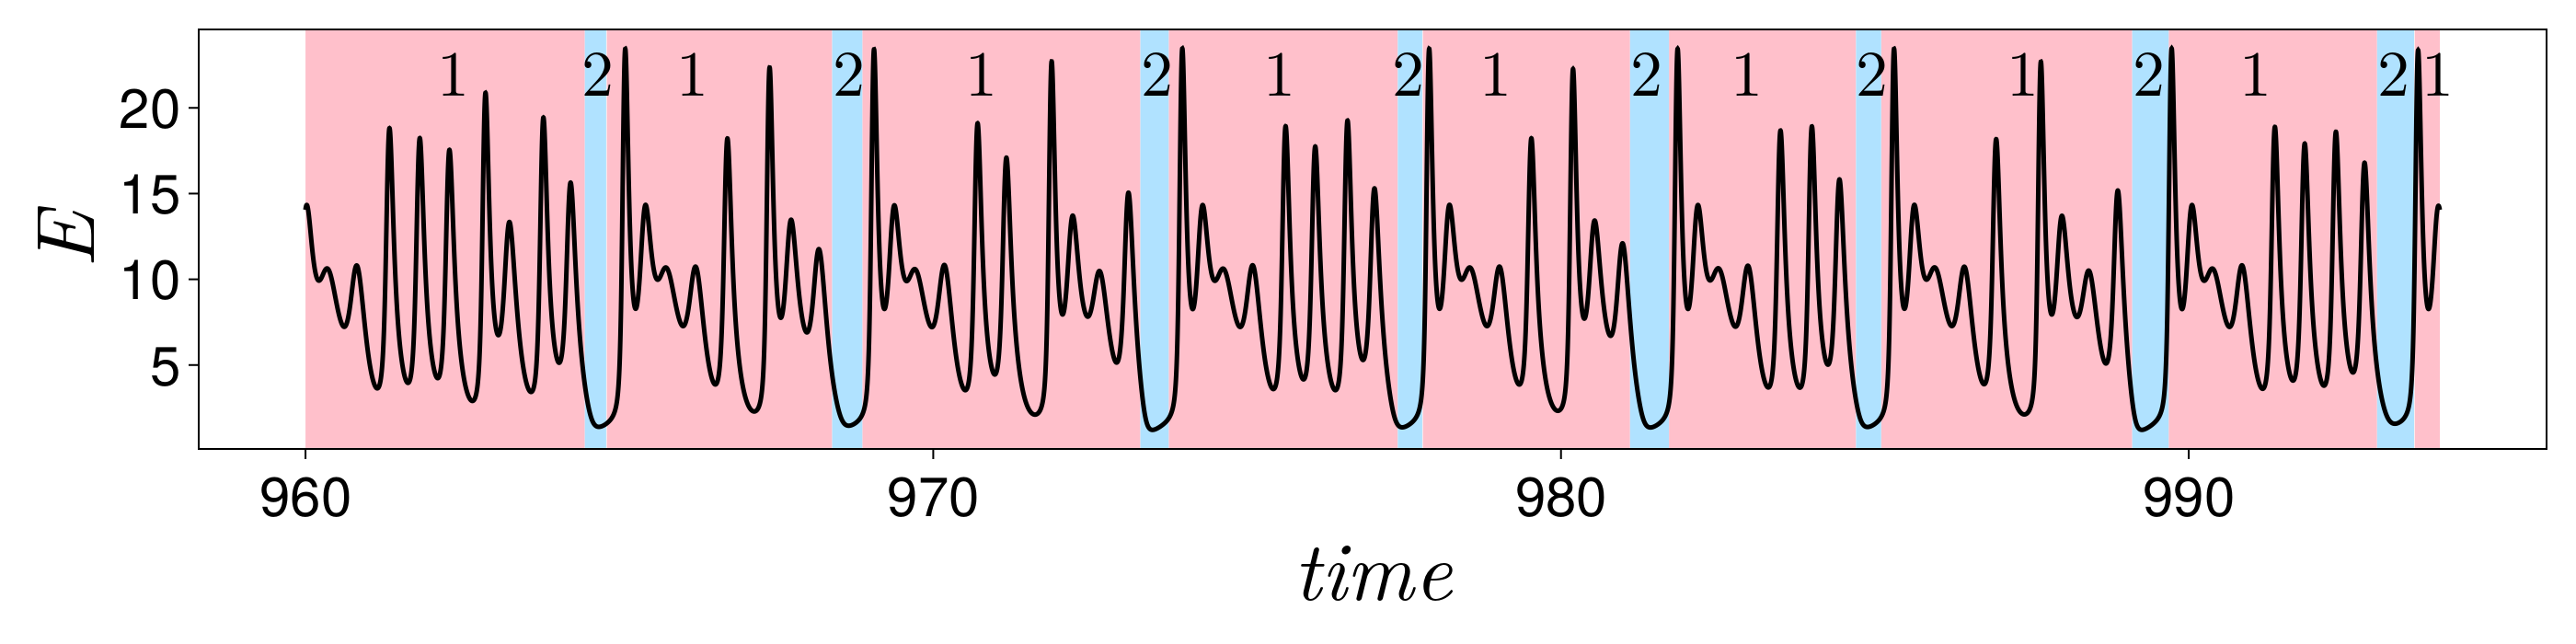

CairoMakie.Screen{IMAGE}


In [36]:
ts, tf = 960000, 994000 # 960000, 994000 # 500000, 580000
lb_size = 45; tck_size = 30;
textsize = 35 
CairoMakie.activate!()
f = Figure(size = (1400, 350))
axis = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

pinkst = [960.0, 964.8, 968.87, 973.75, 977.8, 981.72, 985.1, 989.68, 993.6]
pinkend = [964.45, 968.39, 973.3, 977.4, 981.1, 984.7, 989.1, 993, 994]

bluest = [964.45, 968.39, 973.3, 977.4, 981.1, 984.7, 989.1, 993]
bluend = [964.79, 968.87, 973.75, 977.79, 981.72, 985.1, 989.68, 993.59]


vspan!(pinkst, pinkend, color = :pink)
vspan!(bluest, bluend, color = :lightskyblue1)

text!(axis, 964.4, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 968.39, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 973.3, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 977.3, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 981.1, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 984.7, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 989.1, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 993, 20,  text = L"2", fontsize = textsize, color = :black)


text!(axis, 962.1, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 965.9, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 970.5, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 975.25, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 978.7, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 982.7, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 987.1, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 990.8, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 993.7, 20,  text = L"1", fontsize = textsize, color = :black)


lines!(axis, sol_for.t[ts:tf], sol_for[1, ts:tf], linewidth = 2.5, color = :black)

display(f)

In [37]:
save("timeseries_chaotic_non_hom.pdf", f)

CairoMakie.Screen{PDF}
